In [118]:
import pandas as pd
import seaborn as sns

In [119]:
sns.set(rc = {'figure.figsize':(14, 10)}

# 1. Train table

First, we need to load the table with appropriate data types to reduce memory usage.\
I use pandas because my Mac has an Apple Silicon and there are no hardware accelerated libraries for those chips.\
Anyway, the CPU itself is quite fast and memory limitation is not an issue for my machine (and pandas depends a lot on RAM).

In [4]:
%%time

data_types = {
    'row_id': 'int64',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float32', 
    'prior_question_had_explanation': 'boolean'
}

train = pd.read_csv('train.csv', dtype=data_types)

CPU times: user 52.2 s, sys: 3.09 s, total: 55.2 s
Wall time: 56.6 s


Before we continue looking closely at the numbers I need to explain my approach for speeding up the debug process of scripts in this notebook.\
When I started writing the code, I made a slice of the train dataframe by executing the following commands:

In [4]:
# train_bk = train.copy()
# train = train.head(100000)

And when all the scripts below were ready, I moved back to the following cell, restored the fullset from the backup and executed all the code for the fullset:

In [5]:
# train = train_bk.copy()

### Information about columns

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.1 GB


### Memory usage per column

In [7]:
train.memory_usage(deep=True)

Index                                   128
row_id                            809842656
timestamp                         809842656
user_id                           404921328
content_id                        202460664
content_type_id                   101230332
task_container_id                 202460664
user_answer                       101230332
answered_correctly                101230332
prior_question_elapsed_time       404921328
prior_question_had_explanation    202460664
dtype: int64

### Descriptive statistics

In [8]:
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07,100837826
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89685560
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,1.300508e+04,NaN
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,2.122839e+04,NaN
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,NaN
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04,NaN
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04,NaN
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04,NaN


### First 10 rows

In [9]:
train.head(10)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
5,5,157063,115,156,0,5,2,1,5000.0,False
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
8,8,212463,115,7896,0,8,2,1,16000.0,False
9,9,230983,115,7863,0,9,0,1,16000.0,False


### Number of missing values in each column

In [10]:
train.isnull().sum(axis=0)

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

### Number of unique users and unique batches of questions or lectures

In [11]:
train[['user_id', 'task_container_id']].nunique()

user_id              393656
task_container_id     10000
dtype: int64

### Top 30 users by activity

In [21]:
top_30_users = train.groupby(['user_id'])['user_id'].count().sort_values(ascending=True).tail(30)

<AxesSubplot:title={'center':'Top 30 users by activity'}, ylabel='user_id'>

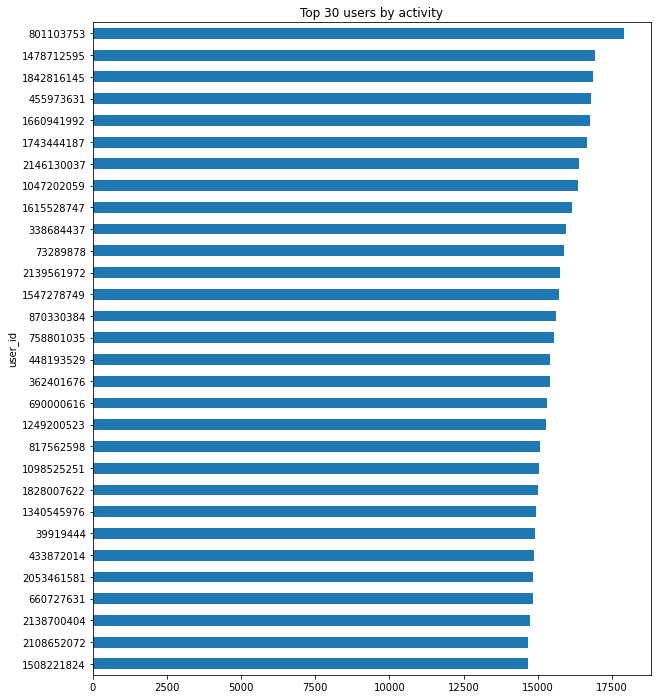

In [22]:
top_30_users.plot(kind='barh', figsize=(10, 12), title='Top 30 users by activity')

### Top 30 content ids

In [32]:
top_30_content = train.groupby(['content_id'])['content_id'].count().sort_values(ascending=False).head(30)

<AxesSubplot:title={'center':'Top 30 content ids'}, xlabel='content_id'>

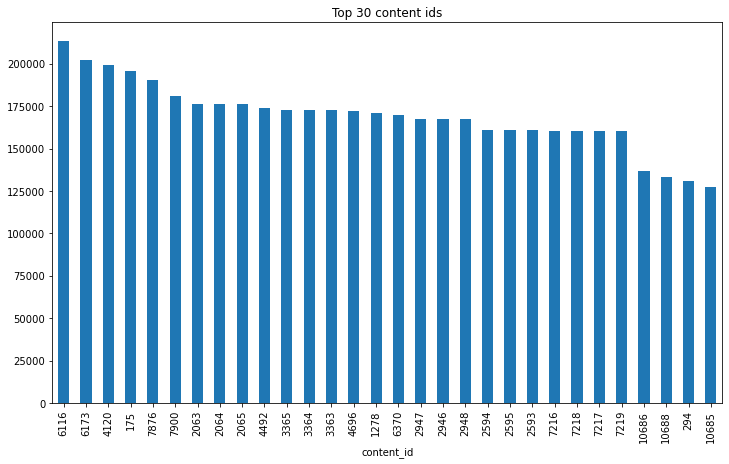

In [33]:
top_30_content.plot(kind='bar', figsize=(12, 7), title='Top 30 content ids')

### Top 30 task container IDs

In [361]:
top_30_task_containers = train.task_container_id.value_counts().sort_values(ascending=False).head(30)

<AxesSubplot:title={'center':'Top 30 task container id'}>

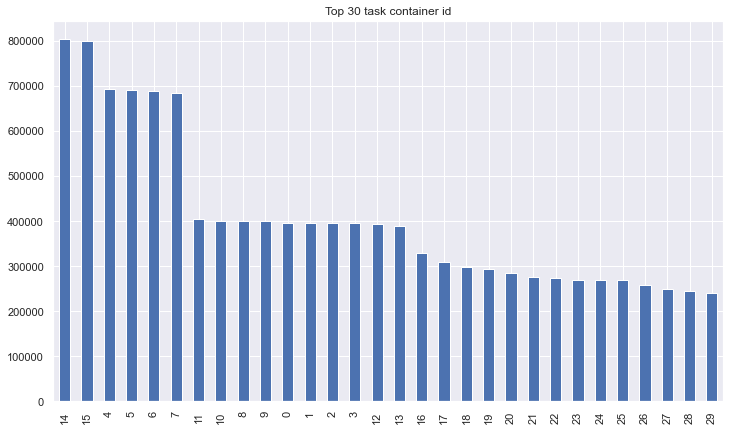

In [362]:
top_30_task_containers.plot(kind='bar', figsize=(12, 7), title='Top 30 task container id')

### Number of questions vs. number of lectures

In [14]:
questions_and_lectures_count = train.content_type_id.value_counts()

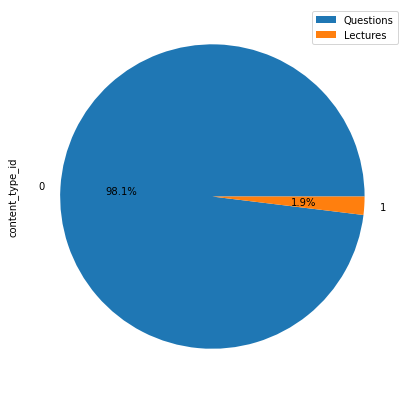

In [15]:
questions_and_lectures_pie = questions_and_lectures_count.plot(kind='pie', figsize=(7, 7), legend=True, autopct='%1.1f%%')
questions_and_lectures_pie.legend(['Questions', 'Lectures'])

### Percentage of correct answers

In [16]:
correct_answers = train.answered_correctly.value_counts()

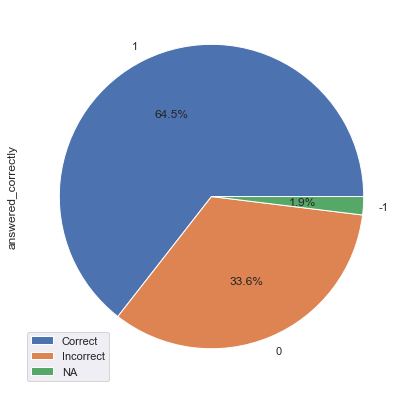

In [355]:
correct_answers_pie = correct_answers.plot(kind='pie', figsize=(7, 7), legend=True, autopct='%1.1f%%')
correct_answers_pie.legend(['Correct', 'Incorrect', 'NA'])

### Prior question elapsed time distribution (in seconds)

In [63]:
# Get prior question elapsed time in seconds
elapsed_time_in_seconds = train.prior_question_elapsed_time // 1000

CPU times: user 1min 34s, sys: 4min 6s, total: 5min 40s
Wall time: 6min 44s


[Text(0.5, 1.0, 'Prior question elapsed time distribution')]

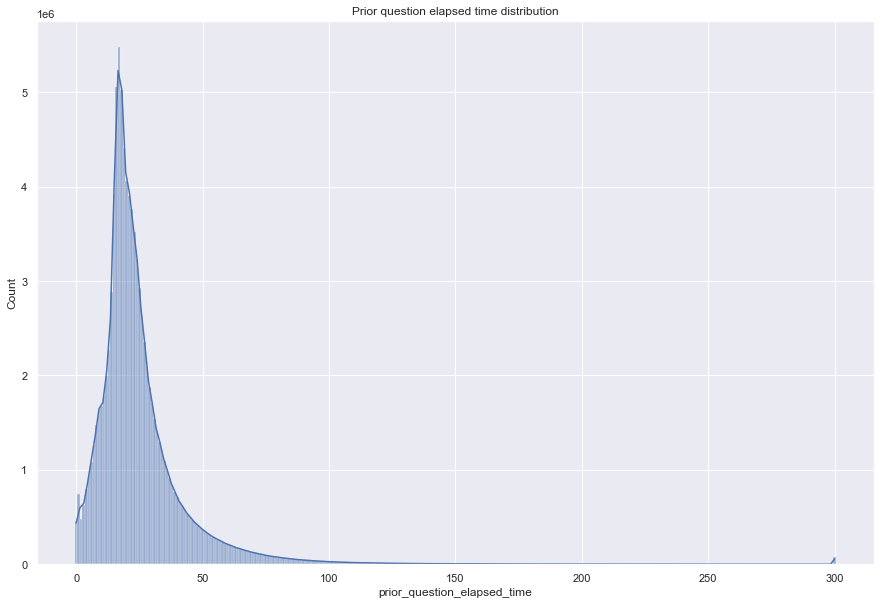

In [142]:
%%time

sns.histplot(elapsed_time_in_seconds, kde=True, discrete=True).set(title='Prior question elapsed time distribution')

### Prior question had explanation and percentage of correct answers

In [89]:
prior_questions = train[train.answered_correctly != -1]. \
    groupby(['prior_question_had_explanation'], dropna=False)['answered_correctly'].agg(sum='sum', count='count')
prior_questions['performance'] = (prior_questions['sum'] / prior_questions['count']) * 100

<AxesSubplot:ylabel='prior_question_had_explanation'>

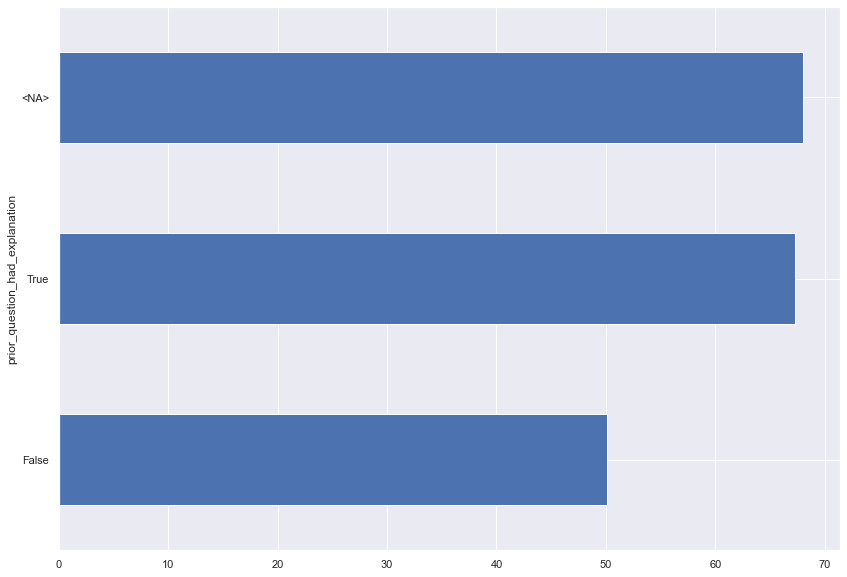

In [88]:
prior_questions['performance'].plot(kind='barh')

There seems to be a connection between having the explanation of the previous question and the correct answer to the current question.

### Performance by users

In [77]:
# Let's create a new table with users and their percentage of correct answers
user_performance = train[['user_id', 'answered_correctly']][train.answered_correctly != -1]
user_performance = user_performance.groupby('user_id')['answered_correctly'].agg(sum='sum', count='count')
user_performance['performance'] = (user_performance['sum'] / user_performance['count']) * 100

[Text(0.5, 1.0, 'Distribution of user performance')]

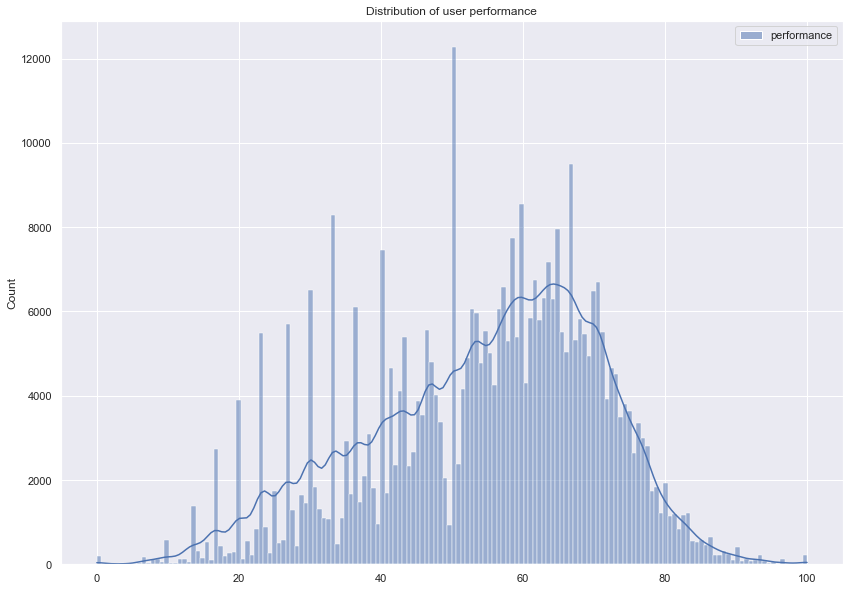

In [78]:
sns.histplot(user_performance[['performance']], kde=True).set(title='Distribution of user performance')

### Percentage of correct answers by content_id

In [79]:
# Let's create a new table with content_id and corresponding percentage of correct answers
correct_answers_by_content = train[['content_id', 'answered_correctly']][train.answered_correctly != -1]
correct_answers_by_content = correct_answers_by_content.groupby('content_id')['answered_correctly'].agg(sum='sum', count='count')
correct_answers_by_content['performance'] = (correct_answers_by_content['sum'] / correct_answers_by_content['count']) * 100

[Text(0.5, 1.0, 'Distribution of ercentage of correct answers in content')]

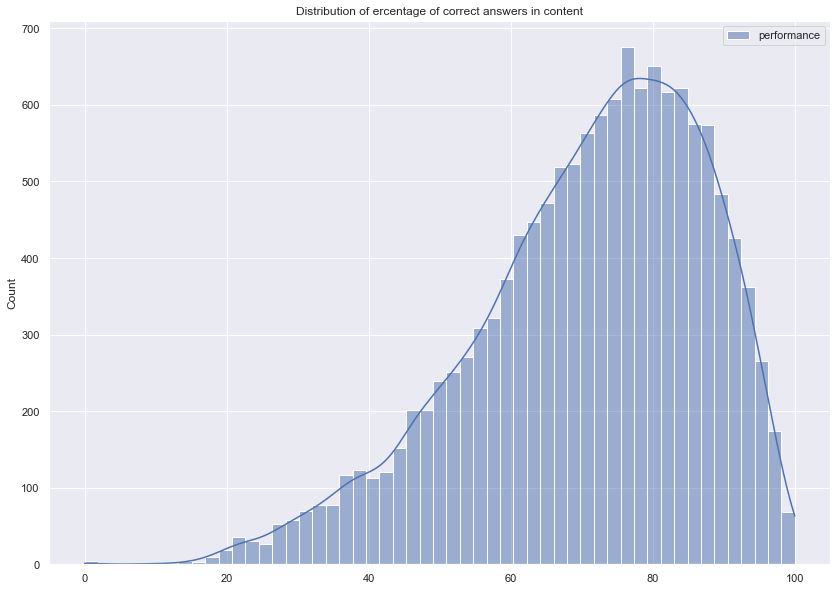

In [80]:
sns.histplot(correct_answers_by_content[['performance']], kde=True).set(title='Distribution of ercentage of correct answers in content')

### Total time spent answering questions per user in minutes

In [298]:
# Let's create a new table with users and total time they spent answering questions
total_time_per_user = train[['user_id', 'prior_question_elapsed_time']][train.prior_question_elapsed_time.isnull() == False]
total_time_per_user = total_time_per_user.groupby('user_id')['prior_question_elapsed_time'].sum()
total_time_per_user.name = 'total_time'
total_time_per_user = total_time_per_user // (60*1000)

<AxesSubplot:xlabel='user_id'>

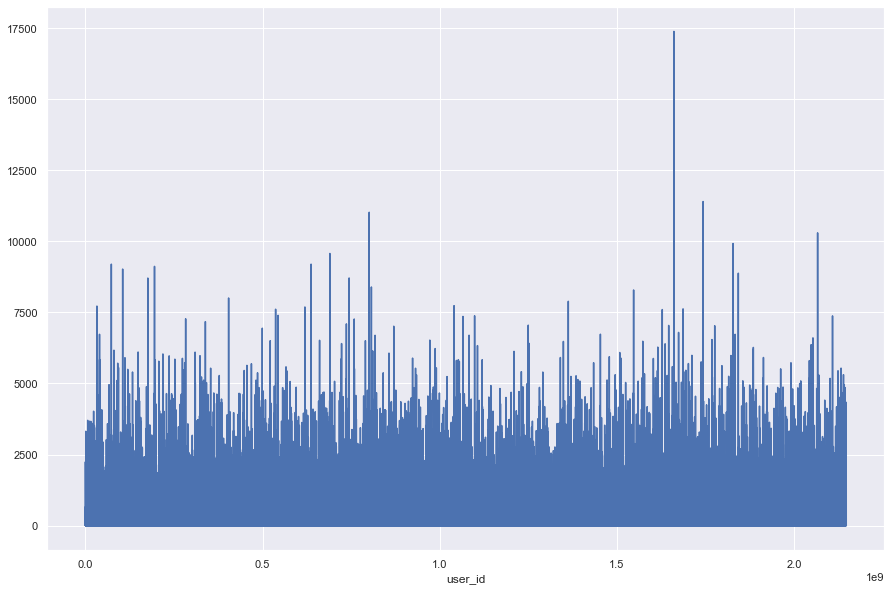

In [176]:
total_time_per_user.plot()

### Student's performance and the number of lectures attended

In [68]:
lectures_attended_by_user = train[train['content_type_id'] == 1].groupby(['user_id'])['user_id'].count()
lectures_attended_by_user.name = 'lectures_count'

In [69]:
performance_and_lectures_attended = user_performance.join(lectures_attended_by_user)
performance_and_lectures_attended = performance_and_lectures_attended[['performance', 'lectures_count']][
    performance_and_lectures_attended.lectures_count.isnull() == False
]

<AxesSubplot:xlabel='performance', ylabel='lectures_count'>

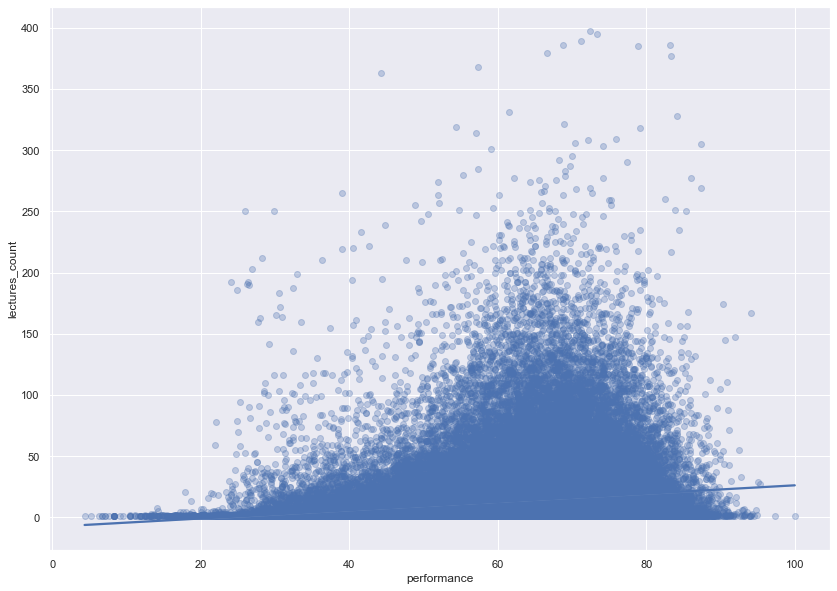

In [131]:
sns.regplot(data=performance_and_lectures_attended, x='performance', y='lectures_count', scatter_kws={'alpha':0.3})

### Student's performance and total time spent answering the questions (in minutes)

In [309]:
performance_and_time_spent = user_performance.join(total_time_per_user)[['performance', 'total_time']]

<AxesSubplot:xlabel='performance', ylabel='total_time'>

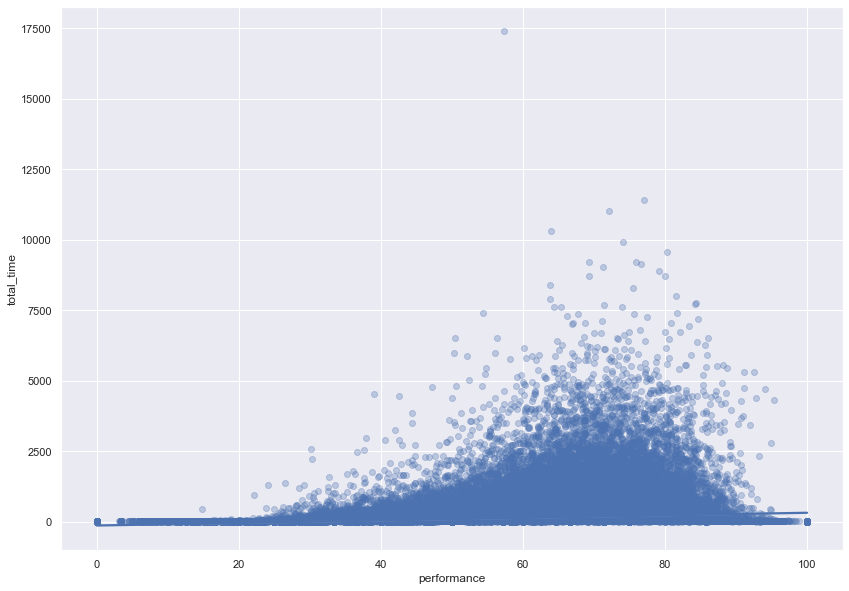

In [132]:
sns.regplot(data=performance_and_time_spent, x='performance', y='total_time', scatter_kws={'alpha':0.3})

# 2. Lectures table

In [311]:
lectures = pd.read_csv('lectures.csv')

In [312]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [314]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


### First 10 rows

In [315]:
lectures.head(10)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
5,335,114,2,concept
6,484,179,5,concept
7,641,134,6,solving question
8,761,93,1,concept
9,814,80,5,solving question


### Number of unique tags, parts and types

In [317]:
lectures[['tag', 'part', 'type_of']].nunique()

tag        151
part         7
type_of      4
dtype: int64

### Percentage of parts

In [371]:
lecture_counts_by_parts = lectures['part'].value_counts().sort_values(ascending=False)
lecture_counts_by_parts.name = 'parts_of_lectures'

<AxesSubplot:ylabel='parts_of_lectures'>

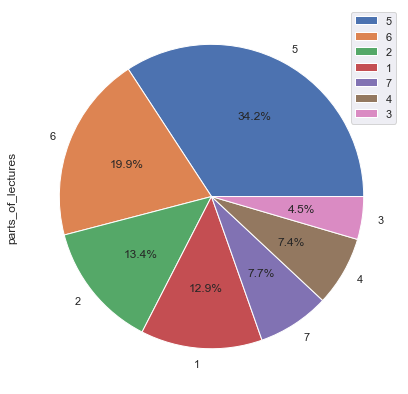

In [372]:
lecture_counts_by_parts.plot(kind='pie', figsize=(7, 7), legend=True, autopct='%1.1f%%')

### Percentage of types of lectures

In [328]:
lecture_counts_by_type = lectures['type_of'].value_counts().sort_values(ascending=False)

<AxesSubplot:ylabel='type_of'>

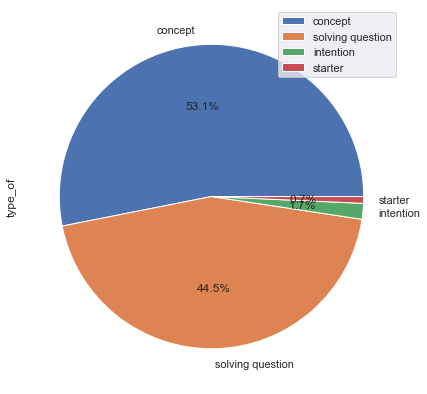

In [329]:
lecture_counts_by_type.plot(kind='pie', figsize=(7, 7), legend=True, autopct='%1.1f%%')

### Top 30 tags

In [346]:
lecture_counts_by_tag = lectures['tag'].value_counts().sort_values(ascending=True).tail(30)

<AxesSubplot:>

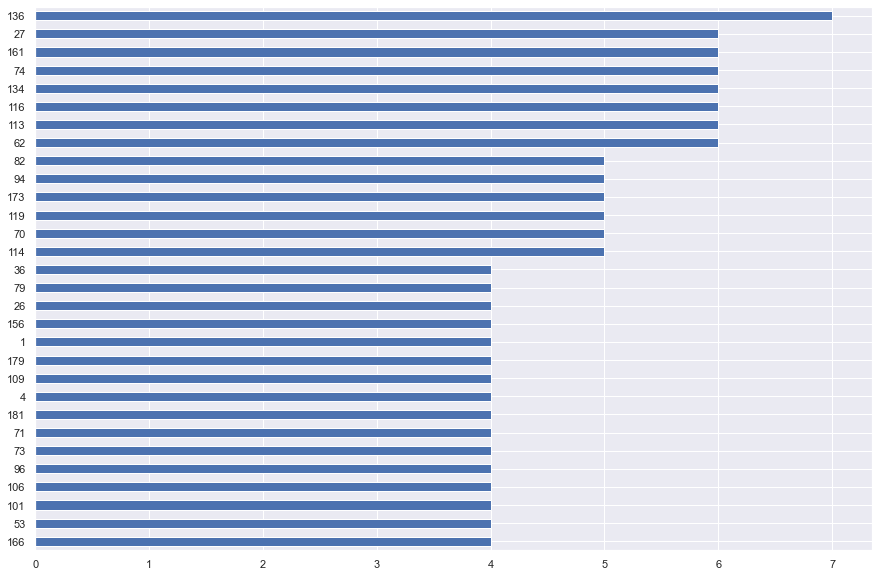

In [347]:
lecture_counts_by_tag.plot(kind='barh')

# 3. Questions table

In [107]:
questions = pd.read_csv('questions.csv')

In [349]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [350]:
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


### First 10 rows

In [351]:
questions.head(10)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
5,5,5,2,1,131 149 162 81
6,6,6,2,1,10 94 162 92
7,7,7,0,1,61 110 162 29
8,8,8,3,1,131 13 162 92
9,9,9,3,1,10 164 81


### Number of unique bundles and parts

In [364]:
questions[['bundle_id', 'part']].nunique()

bundle_id    9765
part            7
dtype: int64

### Percentage of parts

In [369]:
question_counts_by_parts = questions['part'].value_counts().sort_values(ascending=False)
question_counts_by_parts.name = 'parts_of_questions'

<AxesSubplot:ylabel='parts_of_questions'>

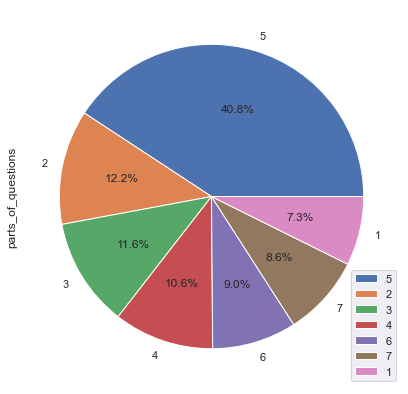

In [370]:
question_counts_by_parts.plot(kind='pie', figsize=(7, 7), legend=True, autopct='%1.1f%%')

### Comparison of percentage of parts of lectures and percentage of parts of questions

In [387]:
lectures_and_questions_parts = pd.DataFrame(lecture_counts_by_parts)
lectures_and_questions_parts = lectures_and_questions_parts.join(question_counts_by_parts)
# Normalizing values
lectures_and_questions_parts.parts_of_lectures = \
    lectures_and_questions_parts.parts_of_lectures / lectures_and_questions_parts.parts_of_lectures.max()
lectures_and_questions_parts.parts_of_questions = \
    lectures_and_questions_parts.parts_of_questions / lectures_and_questions_parts.parts_of_questions.max()

<AxesSubplot:>

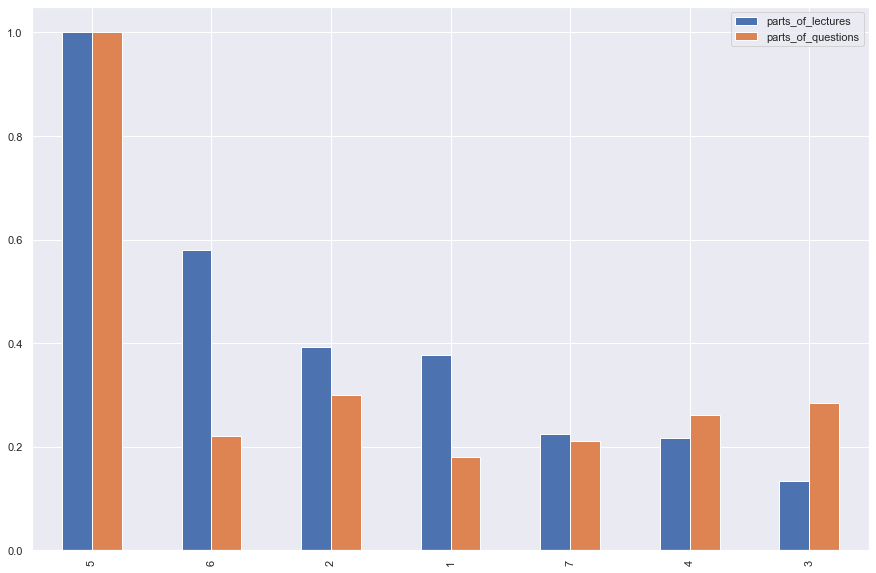

In [438]:
lectures_and_questions_parts.plot(kind='bar')

### "Exploding" tags field
To work correctly with tags, we need to "explode" the tags field into several rows.

In [108]:
questions_exp = questions[questions['tags'].isnull() == False].copy()
questions_exp.tags = questions_exp.tags.str.split()
questions_exp = questions_exp.explode('tags').drop_duplicates()
questions_exp = questions_exp.rename(columns={'tags': 'tag'})
questions_exp.tag = questions_exp.tag.astype('int64')

In [425]:
print(questions.shape[0], '->', questions_exp.shape[0])

13523 -> 30992


Now we have more than twice as many rows, but the tag field now contains single value, just like in the lecture table.

### Comparison of percentage of tags of lectures and percentage of tags of questions (top 30)

In [434]:
lectures_tags = lectures[['tag']].groupby(['tag'])['tag'].count()
lectures_tags.name = 'lectures_tag'
questions_tags = questions_exp[['tag']].groupby(['tag'])['tag'].count()
questions_tags.name = 'question_tag'
lectures_and_questions_tags = pd.DataFrame(lectures_tags)
lectures_and_questions_tags = lectures_and_questions_tags.join(questions_tags)
# Normalizing values
lectures_and_questions_tags.lectures_tag = \
    lectures_and_questions_tags.lectures_tag / lectures_and_questions_tags.lectures_tag.max()
lectures_and_questions_tags.question_tag = \
    lectures_and_questions_tags.question_tag / lectures_and_questions_tags.question_tag.max()

<AxesSubplot:ylabel='tag'>

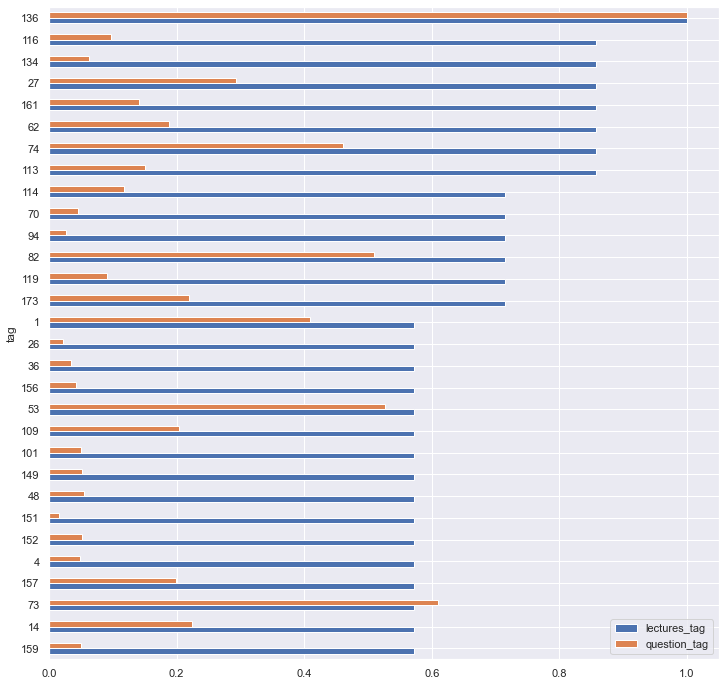

In [445]:
lectures_and_questions_tags.sort_values(by='lectures_tag', ascending=True).tail(30).plot(kind='barh', figsize=(12, 12))

It seems that the coverage of lectures on a particular tag does not match the coverage of questions on the same tag.

# 4. Joining train table with lectures and questions

### Parts and percentage of correct answers

In [103]:
parts_and_correct_answers = train[['answered_correctly', 'content_id']][train.answered_correctly != -1]
parts_and_correct_answers = parts_and_correct_answers.merge(
    questions[['question_id', 'part']], how='left', left_on='content_id', right_on='question_id'
)[['answered_correctly', 'part']]
parts_and_correct_answers = parts_and_correct_answers.groupby(['part'])['answered_correctly'].agg(sum='sum', count='count')
parts_and_correct_answers['performance'] = (parts_and_correct_answers['sum'] / parts_and_correct_answers['count']) * 100
parts_and_correct_answers = parts_and_correct_answers[['performance']]
parts_and_correct_answers = parts_and_correct_answers.sort_values(by='performance', ascending=False)

<AxesSubplot:title={'center':'Parts and percentage of correct answers'}, xlabel='part'>

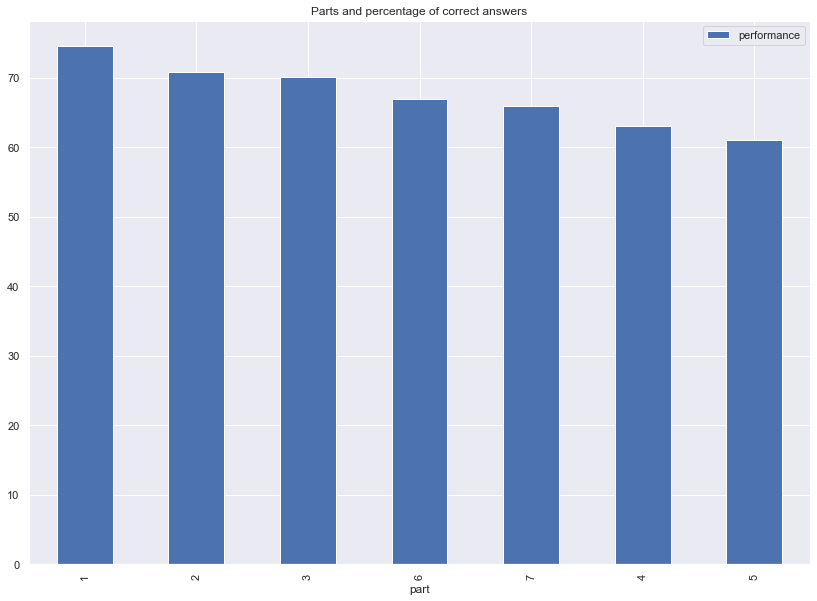

In [104]:
parts_and_correct_answers.plot(kind='bar', title='Parts and percentage of correct answers')

### Top 30 easiest tags

In [111]:
tags_and_correct_answers = train[['answered_correctly', 'content_id']][train.answered_correctly != -1]
tags_and_correct_answers = tags_and_correct_answers.merge(
    questions_exp[['question_id', 'tag']], how='left', left_on='content_id', right_on='question_id'
)[['answered_correctly', 'tag']]
tags_and_correct_answers = tags_and_correct_answers.groupby(['tag'])['answered_correctly'].agg(sum='sum', count='count')
tags_and_correct_answers['performance'] = (tags_and_correct_answers['sum'] / tags_and_correct_answers['count']) * 100
tags_and_correct_answers = tags_and_correct_answers[['performance']]

<AxesSubplot:ylabel='tag'>

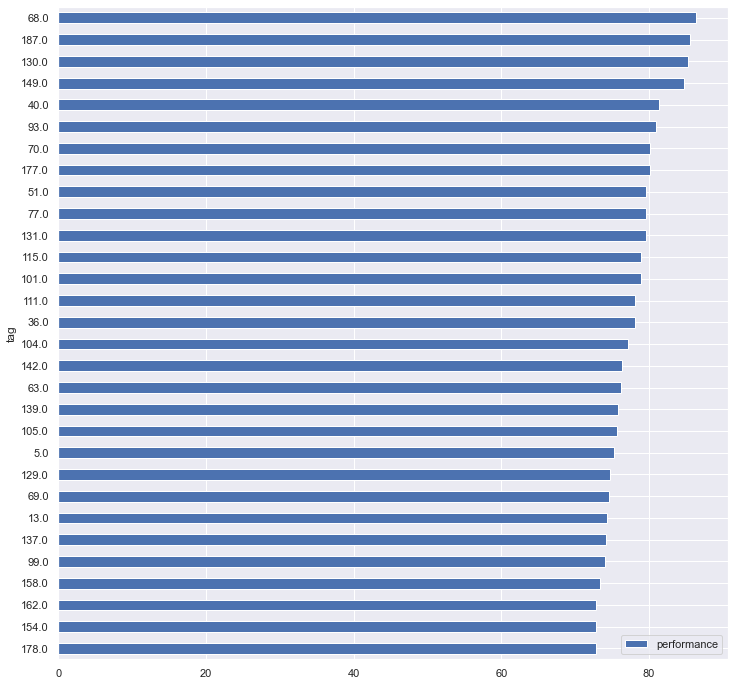

In [114]:
tags_and_correct_answers.sort_values(by='performance', ascending=True).tail(30).plot(kind='barh', figsize=(12, 12))

### Top 30 hardest tags

<AxesSubplot:ylabel='tag'>

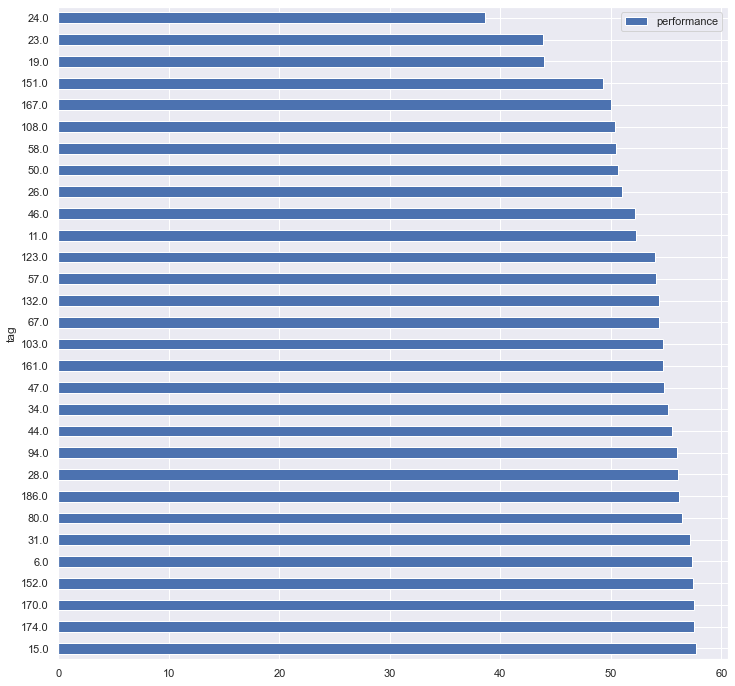

In [117]:
tags_and_correct_answers.sort_values(by='performance', ascending=False).tail(30).plot(kind='barh', figsize=(12, 12))

### Student's performance by part

In [75]:
user_performance_by_part = train[['user_id', 'answered_correctly', 'content_id']][train.answered_correctly != -1]
user_performance_by_part = user_performance_by_part.merge(
    questions[['question_id', 'part']], how='left', left_on='content_id', right_on='question_id'
)[['user_id', 'answered_correctly', 'part']]
user_performance_by_part = user_performance_by_part.groupby(['user_id', 'part'])['answered_correctly'].agg(sum='sum', count='count')
user_performance_by_part['performance'] = (user_performance_by_part['sum'] / user_performance_by_part['count']) * 100
user_performance_by_part = user_performance_by_part[['performance']]

<AxesSubplot:xlabel='performance', ylabel='part'>

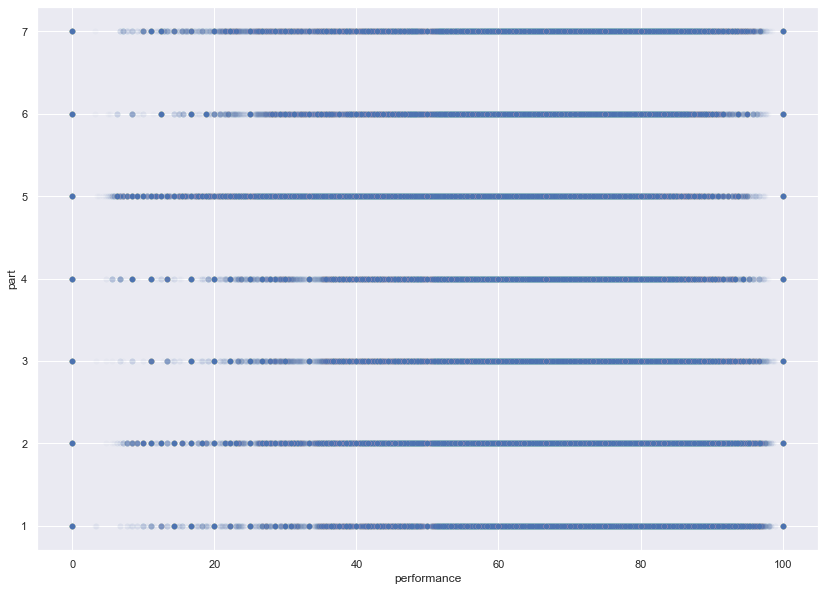

In [128]:
sns.scatterplot(data=user_performance_by_part, x='performance', y='part', alpha=0.03)

None of the parts seem to be overly complicated or overly easy.\
But the performance for Part 5 is more evenly distributed.

### Student's performance by tag

In [121]:
user_performance_by_tag = train[['user_id', 'answered_correctly', 'content_id']][train.answered_correctly != -1]
user_performance_by_tag = user_performance_by_tag.merge(
    questions_exp[['question_id', 'tag']], how='left', left_on='content_id', right_on='question_id'
)[['user_id', 'answered_correctly', 'tag']]
user_performance_by_tag = user_performance_by_tag.groupby(['user_id', 'tag'])['answered_correctly'].agg(sum='sum', count='count')
user_performance_by_tag['performance'] = (user_performance_by_tag['sum'] / user_performance_by_tag['count']) * 100
user_performance_by_tag = user_performance_by_tag[['performance']]

In [124]:
# Let's clean data by removing users with 0 and 100 performance
mask = (user_performance_by_tag['performance'] > 0) & (user_performance_by_tag['performance'] < 100)
user_performance_by_tag_clean = user_performance_by_tag[mask]

<AxesSubplot:xlabel='performance', ylabel='tag'>

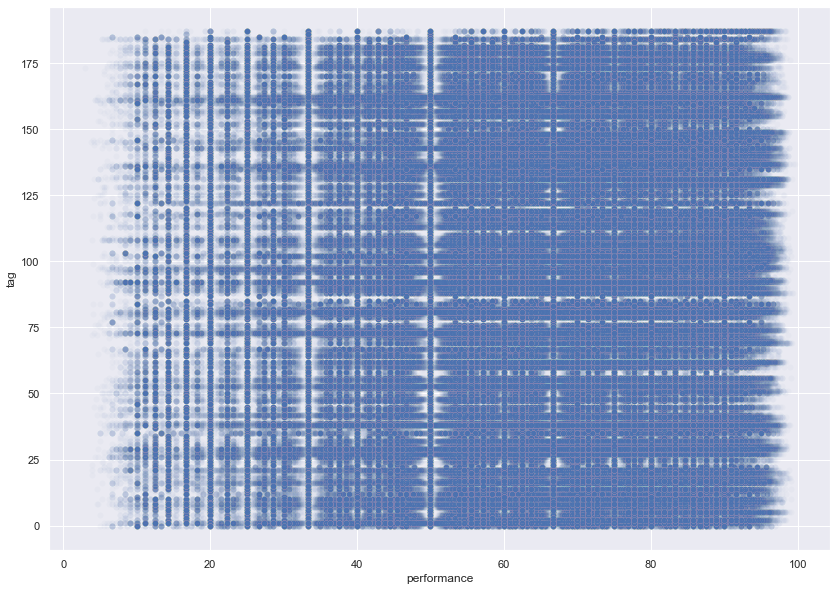

In [127]:
sns.scatterplot(data=user_performance_by_tag_clean, x='performance', y='tag', alpha=0.03)

The picture here is the same as with the parts - in general, there are no very complicated tags and no very easy ones.